In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
iris = datasets.load_iris()

X = iris.data #raw data
Y = iris.target #known groups (only for supervised analysis, I think)
target_names = iris.target_names

In [5]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [21]:
X_r

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [8]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, Y).transform(X)

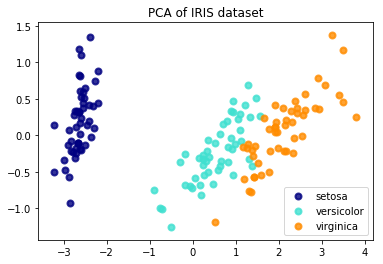

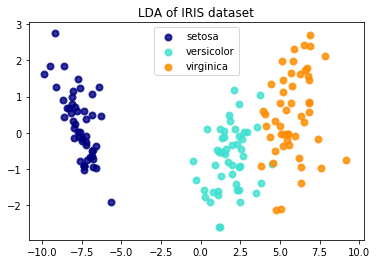

In [11]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[Y == i, 0], X_r2[Y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [65]:
import diff_classifier.aws as aws
import pandas as pd
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3

In [108]:
rfol = '01_18_Experiment/P3'
features = 'features_P3_S1_R_0012'
rfile = '{}/{}.csv'.format(rfol, features)
lfile = '{}.csv'.format(features)

aws.download_s3(rfile, lfile, bucket_name='ccurtis.data')
feat = pd.read_csv(lfile, sep=",", index_col='Unnamed: 0')

In [92]:
# f1 = feat[['AR', 'D_fit', 'MSD_ratio', 'alpha', 'asymmetry1', 'boundedness', 'elongation',
#       'fractal_dim', 'kurtosis', 'straightness', 'trappedness']].dropna(axis=0)
f1 = feat[['AR', 'D_fit', 'MSD_ratio', 'alpha', 'asymmetry1', 'boundedness', 'elongation', 'fractal_dim',
           'kurtosis', 'straightness', 'trappedness']].replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [109]:
f2 = feat[['AR', 'D_fit', 'MSD_ratio', 'alpha', 'asymmetry1', 'boundedness', 'elongation', 'fractal_dim',
           'kurtosis', 'straightness', 'trappedness']].replace([np.inf, -np.inf], np.nan).dropna(axis=0)

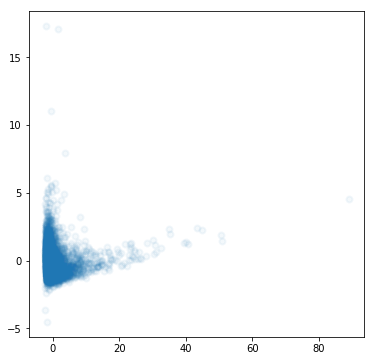

In [104]:
pca = PCA(n_components=2)
f1_r = pca.fit(f1).transform(f1)

plt.figure(figsize=(6, 6))
plt.scatter(f1_r[:, 0], f1_r[:, 1], alpha=0.05, lw=lw)
plt.show()

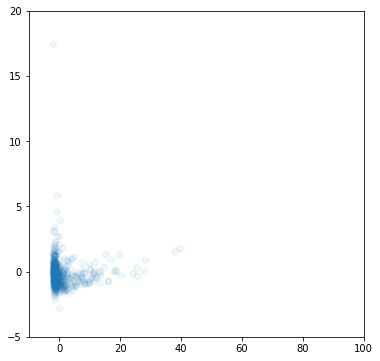

In [110]:
f1_r = pca.fit(f1).transform(f2)

plt.figure(figsize=(6, 6))
plt.scatter(f1_r[:, 0], f1_r[:, 1], alpha=0.05, lw=lw)
plt.xlim([-10, 100])
plt.ylim([-5, 20])
plt.show()

In [100]:
f1_r

array([[-2.03692444,  4.07664289],
       [-1.67785888, -0.04936294],
       [-1.99945816,  1.37584273],
       ..., 
       [-0.61872009, -0.15697414],
       [ 0.98444751,  0.33338721],
       [-1.73134361,  0.01642127]])

In [69]:
# pca = PCA(n_components=3)
# f1_r = pca.fit(f1).transform(f1)

# fig = plt.figure()
# ax = p3.Axes3D(fig)
# ax.view_init(80, -80)
# plt.scatter(f1_r[:, 0], f1_r[:, 1], f1_r[:, 2], alpha=0.05, lw=lw)
# plt.show()